In [1]:
import os
import os.path as osp
import pandas as pd
import numpy as np
from snorkel import SnorkelSession
from tcre.env import *
from tcre.supervision import *
from tcre.modeling import utils
from tcre.modeling import features
%matplotlib inline
session = SnorkelSession()
classes = get_candidate_classes()

In [3]:
from snorkel.models import Candidate, GoldLabel
candidate_class = classes.inducing_cytokine
cands = session.query(candidate_class.subclass)\
    .filter(candidate_class.subclass.split == SPLIT_DEV).all()
len(cands)

1025

In [4]:
import imp
imp.reload(features)

<module 'tcre.modeling.features' from '/lab/repos/t-cell-relation-extraction/src/tcre/modeling/features.py'>

In [5]:
# import spacy
# nlp = spacy.load('en_core_sci_md')

In [6]:
pd.set_option('display.max_colwidth', 250)
# markers = {
#     'primary': {'immune_cell_type': ['<<', '>>'], 'cytokine': ['[[', ']]'], 'transcription_factor': ['{{', '}}']},
#     'secondary': {'immune_cell_type': ['<#', '#>'], 'cytokine': ['<%', '%>'], 'transcription_factor': ['<*', '*>']}
# }
# markers = {
#     'primary': {'immune_cell_type': ['<', '>'], 'cytokine': ['[', ']'], 'transcription_factor': ['(', ')']},
#     'secondary': {'immune_cell_type': ['*', '*'], 'cytokine': ['#', '#'], 'transcription_factor': ['%', '%']}
# }
markers = {
    'primary': {'immune_cell_type': ['< #', '# >'], 'cytokine': ['< @', '@ >'], 'transcription_factor': ['< *', '* >']},
    'secondary': {'immune_cell_type': ['| #', '# |'], 'cytokine': ['| @', '@ |'], 'transcription_factor': ['| *', '* |']}
}
# markers = {
#     'primary': {'immune_cell_type': ['', ''], 'cytokine': ['', ''], 'transcription_factor': ['', '']},
#     'secondary': {'immune_cell_type': ['|#', '#|'], 'cytokine': ['|@', '@|'], 'transcription_factor': ['|*', '*|']}
# }
# swaps = {
#     'immune_cell_type': 'CELL',
#     'cytokine': 'CYTOKINE',
#     'transcription_factor': 'TF'
# }
swaps = None

In [7]:
df = features.get_record_features(
    features.candidates_to_records(cands), markers=markers, swaps=swaps, 
    subtokenizer=lambda t: t.split(), lower=False, assert_unique=False
).rename(columns={'tokens': 'text'})
df.head()

100%|██████████| 1025/1025 [00:04<00:00, 241.46it/s]


,id,label,e0_dist,e0_text,e1_dist,e1_text,tags,text
0,12,0.0,"[-35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -26, -25, -24, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...",IL-21,"[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 24, 25, 26, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]",Tfh,"[O, O, O, O, O, O, O, O, O, O, O, E:primary:immune_cell_type, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, E:primary:cytokine, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[Using, human, monocyte-derived, DCs, ,, Schmitt, et, al., compared, <, #, Tfh, #, >, inducing, capacities, of, different, TLR, agonists, and, show, that, TLR4, ,, TLR5, ,, and, TLR7/8, ,, but, not, TLR2, ,, activation, induces, <, @, IL-21, @, >..."
1,526,0.0,"[-62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -48, -47, -46, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -33, -32, -31, -31, -30, -29, -29, -28, -27, -27, -26, -25, -25, -24, -23, -23, -22, ...",IL-6,"[-15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 15, 16, 16, 17, 18, 18, 19, 20, 20, 21, 22, 22, 23, 24, 24, 25, 26, 26, 27, 28, 28, 29, 30, 30, 31, 32, 32, 33, 34, 34...",EMT,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, E:primary:immune_cell_type, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, E:secondary:cytokine, O, O, O, O, O, E:secondary:cytokine, O, O, O, O, O, E:secondary:cytokine, O, O, O, O, O, E:secondar...","[APCs, ,, antigen-presenting, cells, (, dendritic, cells, ,, macrophages, ,, and, monocytes, ), ;, <, #, EMT, #, >, ,, epithelial, –, mesenchymal, transition, ;, HSC, ,, hepatic, stellate, cell, ;, |, @, IL-1, @, |, ,, |, @, interleukin-1, @, |, ..."
2,1312,0.0,"[-76, -75, -74, -73, -72, -71, -70, -69, -68, -67, -66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -36, -35, -34, -34, -33, -32, -31, -30, ...",transforming growth factor,"[-66, -65, -64, -63, -62, -61, -60, -59, -58, -57, -56, -55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -26, -25, -24, -24, -23, -22, -21, -20, ...",T helper,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, E:secondary:cytokine, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, E:secondary:immune_cell_type, O, O...","[BM-MSCs, ,, bone, marrow-derived, mesenchymal, stem, cells, ;, Bregs, ,, regulatory, B, cell, ;, CD, ,, Crohn, ’s, disease, ;, EAE, ,, experimental, autoimmune, encephalomyelitis, ;, GVHD, ,, graft-versus-host, diseases, ;, hUC-MSCs, ,, human, u..."
3,2022,0.0,"[-90, -89, -88, -87, -86, -85, -84, -83, -82, -81, -80, -79, -78, -77, -76, -75, -74, -73, -72, -71, -70, -69, -68, -68, -67, -66, -66, -65, -64, -64, -63, -62, -62, -61, -60, -60, -59, -58, -57, -56, -56, -55, -54, -53, -53, -52, -51, -51, -50, ...",IL-1β,"[-38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -16, -15, -14, -14, -13, -12, -12, -11, -10, -10, -9, -8, -8, -7, -6, -5, -4, -4, -3, -2, -1, -1, 0, 1, 1, 2, 3, 3, 4, 5, 5, 6, 7,...",TH2,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, E:secondary:immune_cell_type, O, O, O, O, O, E:secondary:cytokine, O, O, O, O, O, E:secondary:cytokine, E:secondary:cytokine, E:secondary:cytokine, O, O, O, O, O, O, E:prima...","[In, cultures, from, 20-, to, 24-week-old, Winnie, mice, ,, there, was, a, highly, significan

In [8]:
from tcre.modeling import data as tcre_data
from torchtext import data as txd
from torchtext.vocab import Vocab
from collections import defaultdict, Counter

DIST_PAD_VAL = features.MAX_POS_DIST + 1
SEQ_LEN = 128
fields = {
    'text': txd.Field(sequential=True, lower=False, fix_length=SEQ_LEN, include_lengths=True),
    'label': txd.Field(sequential=False),
    'e0_dist': txd.Field(sequential=True, use_vocab=False, pad_token=DIST_PAD_VAL, fix_length=SEQ_LEN),
    'e1_dist': txd.Field(sequential=True, use_vocab=False, pad_token=DIST_PAD_VAL, fix_length=SEQ_LEN),
    'id': txd.Field(sequential=False, use_vocab=False)
}
        
ds = tcre_data.DataFrameDataset(df, fields)
for k, f in fields.items():
    if k in ['label', 'text']:
        fields[k].build_vocab(ds)

In [9]:
pd.concat([df['label'].value_counts(), df['label'].value_counts(normalize=True)], axis=1)

,label,label
0.0,880,0.858537
1.0,145,0.141463


In [10]:
from gensim.models import KeyedVectors

# Load pretrained model (since intermediate data is not included, the model cannot be refined with additional data)
w2vmodel = KeyedVectors.load_word2vec_format(W2V_MODEL_01, binary=True, limit=50000)

/opt/conda/envs/nlp/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [11]:
len(w2vmodel.vocab)

50000

In [12]:
import torch
import numpy as np
from torchtext.vocab import Vocab
from collections import defaultdict, Counter
    
class W2VVocab(Vocab):

    def __init__(self, model):
        super().__init__(Counter())
        specials = ['<pad>']
        self.itos = specials + list(model.vocab.keys())

        # Use zero vector for unk as well as pad
        def get_unk_index():
            return 0
        self.stoi = defaultdict(get_unk_index)
        self.stoi.update({w: i for i, w in enumerate(self.itos)})

        if len(self.itos) != len(self.stoi):
            raise ValueError(
                f'W2V vocab has repeated words (probably due to unicode normalization) '
                f'(len(itos) = {len(itos)}, len(stoi) = {len(stoi)}')
        self.vectors = torch.cat([
            torch.FloatTensor(np.zeros((len(specials), model.vectors.shape[1]))),
            torch.FloatTensor(model.vectors)
        ], dim=0)

        
# class IntegerVocab(Vocab):
    
#     def __init__(self, int_range, specials=['<pad>']):
#         super().__init__(Counter())
#         self.itos = specials + list(range(int_range[0], int_range[1]+1))
#         self.stoi = {w: i for i, w in enumerate(self.itos)}
#         self.vectors = None
        
w2vocab = W2VVocab(w2vmodel)

In [13]:
fields['text'].vocab = w2vocab

In [14]:
len(fields['text'].vocab), len(w2vmodel.vocab)

(50001, 50000)

In [26]:
# ds = txd.TabularDataset('/tmp/data.csv', fields=[('text', TEXT), ('label', LABEL)], format='csv', skip_header=True)
# LABEL.build_vocab(ds)

In [15]:
ds_train, ds_val = ds.split(stratified=True, strata_field='label')

In [16]:
len(ds_train), len(ds_val)

(718, 307)

In [17]:
pd.Series(list(ds_val.label)).value_counts(), pd.Series(list(ds_train.label)).value_counts()

(0.0    264
 1.0     43
 dtype: int64, 0.0    616
 1.0    102
 dtype: int64)

In [36]:
# Compare single example to numeric features
# from torchtext.data import Iterator
# ds.examples[0].text
# b = next(iter(Iterator(ds, 3, shuffle=False)))
# b.text[0].t()
#b.e1_dist.t()

In [34]:
from torchtext.data import BucketIterator
train_iter, val_iter, test_iter = BucketIterator.splits(
    (ds_train, ds_val, ds_val), 
    batch_sizes=(32, 32, 32),
    sort_key=lambda x: len(x.text), 
    sort=True,
    sort_within_batch=True,
    repeat=False,
    shuffle=False
)
#ds_iter = txd.Iterator(ds, 10, sort_within_batch=True, sort_key=lambda x: len(x.text), device='cuda')

In [57]:
# Create dataframe with sequential features (padded to 128 columns) as well as label and id (useful for debugging)
def getiterdf(iterator):
    args = [(b.text[0].t().detach().numpy(), b.id.detach().numpy(), b.label.detach().numpy()) for b in iterator]
    df = pd.DataFrame(np.concatenate([a[0] for a in args], axis=0))
    df['id'] = np.concatenate([a[1] for a in args], axis=0)
    df['label'] = np.concatenate([a[2] for a in args], axis=0)
    return df

dftmp = getiterdf(train_iter)
dftmp.head()

,0,1,2,3,4,5,6,7,8,9,...,120,121,122,123,124,125,126,127,id,label
0,4104,3,46,36,275,18,87,35310,2010,35310,...,0,0,0,0,0,0,0,0,75824,2
1,87,2979,9082,2979,199,31,24,2155,0,3,...,0,0,0,0,0,0,0,0,8035,1
2,149,4133,2,150,5,87,35310,3398,35310,199,...,0,0,0,0,0,0,0,0,75971,1
3,60,2018,1960,21,2,150,5,87,35310,3398,...,0,0,0,0,0,0,0,0,75954,1
4,149,4133,2,150,5,87,35310,3398,35310,199,...,0,0,0,0,0,0,0,0,75970,1


In [19]:
b = next(iter(train_iter))

In [136]:
b.text[0].t().detach().numpy()[0]

array([   60,   107, 46319,   801,    12, 33393,     5,     0,    27,
           2,    87, 35310,  8697, 35310,   199,  1659,     7,     0,
          87,  2979,  6594,  2979,   199,     3,    63,  4644,  2401,
         763,    29,   982,   403,   492,     5,     2,    94,     4,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0]

In [137]:
b.e0_dist.t()[0]

tensor([-11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,  -1,   0,   1,
          1,   2,   3,   4,   5,   5,   6,   7,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128, 128,
        128, 128])

In [41]:
b.id

tensor([30612, 30397, 30311, 30819, 30818, 30620, 30621, 30681, 30827, 30826,
        30499, 30301, 30429, 30623, 30624, 30670, 30503, 30214, 30601, 30502,
        30733, 30484, 30304, 30728, 30413, 30677, 30678, 30273, 30695, 30216,
        30482, 30646])

In [42]:
b.fields

dict_keys(['text', 'label', 'e0_dist', 'e1_dist', 'id'])

In [43]:
b.dataset.fields

{'text': <torchtext.data.field.Field at 0x7f2ae00fc710>,
 'label': <torchtext.data.field.Field at 0x7f2ae00fce80>,
 'e0_dist': <torchtext.data.field.Field at 0x7f2ae00fc0b8>,
 'e1_dist': <torchtext.data.field.Field at 0x7f2ae00fc898>,
 'id': <torchtext.data.field.Field at 0x7f2adff1d278>}

In [148]:
b.input_fields, b.target_fields

(['text', 'label', 'e0_dist', 'e1_dist', 'id'], [])

### Set Model

In [44]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence
import torch.optim as optim

In [197]:
def pos_indices(pos, max_dist, pad_val):
    """Convert position features provided as positive or negative integers to embedding indices
    
    Example: 
        pos = torch.IntTensor([-100, -4, -3, -2, -1, 0, 1, 2, 3, 4, 100, 99, 99])
        pos_indices(pos, 2, 99) -> [1, 1, 1, 2, 3, 4, 5, 6, 7, 7, 7, 0, 0]
    """
    if torch.any(pos > pad_val):
        raise ValueError(f'Position array has value > padding value (max pos = {pos.max().item()}, pad val = {pad_val})')
    offset = max_dist + 2
    pos = pos + offset
    pos = torch.clamp(pos, 1, pad_val+offset)
    pos[pos==(pad_val + offset)] = 0
    pos = torch.clamp(pos, 0, 2*max_dist + 3)
    return pos


class RNN(nn.Module):

    def __init__(self, fields, cardinality=2, hidden_dim=50, wrd_embed_dim=None, pos_embed_dim=10, train_wrd_embed=None, 
                 num_layers=1, cell_type=nn.LSTM, 
                 dropout=0, bidirectional=False, max_dist=50, device=None, names=['text', 'label', 'e0_dist', 'e1_dist', 'id']):
        super().__init__()
        self.fields = fields
        self.cardinality = cardinality
        self.hidden_dim = hidden_dim
        self.pos_embed_dim = pos_embed_dim
        self.wrd_embed_dim = wrd_embed_dim
        self.train_wrd_embed = train_wrd_embed 
        if self.train_wrd_embed is None:
            self.train_wrd_embed = wrd_embed_dim is not None
        self.num_layers = num_layers
        self.dropout = dropout
        self.bidirectional = bidirectional
        self.num_directions = 2 if self.bidirectional else 1
        self.cell_type = cell_type
        self.max_dist = max_dist
        self.device = device
        self.names = names
        
        self._init_embedding()
        self._init_cell()
        self.output = nn.Linear(self.hidden_dim * self.num_directions, self.cardinality if self.cardinality > 2 else 1)
        self.dropout = nn.Dropout(p=dropout)
        
    def _init_embedding(self):
        if self.wrd_embed_dim:
            self.wrd_embed_shape = (len(self.fields[self.names[0]].vocab), self.wrd_embed_dim)
            self.wrd_embed = nn.Embedding(*self.wrd_embed_shape, padding_idx=0)
        else:
            vectors = self.fields[self.names[0]].vocab.vectors
            self.wrd_embed_shape = tuple(vectors.shape)
            self.wrd_embed = nn.Embedding.from_pretrained(vectors, padding_idx=0)
        self.wrd_embed.weight.requires_grad = self.train_wrd_embed
        
        # Index values are 0=pad, 1=< -max_dist, 2=-max_dist, 3=-max_dist+1, ..., 2*(max_dist+2) > max_dist 
        self.pos_embed_shape = (2*(self.max_dist+2), self.pos_embed_dim)
        # Define without looping/lists as placement on GPU will fail otherwise
        self.pos_embed_e0 = nn.Embedding(*self.pos_embed_shape, padding_idx=0)
        self.pos_embed_e1 = nn.Embedding(*self.pos_embed_shape, padding_idx=0)
        
        
    def _init_cell(self):
        self.cell = self.cell_type(
            self.wrd_embed_shape[1] + 2*self.pos_embed_dim, self.hidden_dim,
            num_layers=self.num_layers, bidirectional=self.bidirectional,
            dropout=self.dropout, batch_first=True
        )

    def prepare(self, batch, **kwargs):
        """Extract seq token indices, seq lengths, and training labels"""
        text, label, e0_dist, e1_dist, ids = [getattr(batch, n) if n in batch.fields else None for n in self.names]
        # Text index sequences and associated lengths
        X, L = text[0].t(), text[1]
        # Example ids (integers)
        I = ids.type(torch.IntTensor)
        # Convert relative positions (as pos/neg integers or pad) to embedding indices
        D0, D1 = [pos_indices(v.t(), self.max_dist, DIST_PAD_VAL) for v in [e0_dist, e1_dist]]
        # Example labels
        Y = None if label is None else (label - 1).type(torch.FloatTensor).to(self.device)
        features = (X, L, D0, D1, I)
        return tuple([f.to(self.device) for f in features]), Y
        
        
    def transform(self, Y):
        return torch.sigmoid(Y) if self.cardinality == 2 else torch.softmax(Y)

    def classify(self, Y):
        return torch.round(Y) if self.cardinality == 2 else torch.argmax(Y, dim=0)
    
    def forward(self, features):
        X, L, D0, D1, _ = features
        H = self.initial_hidden_state(len(X))
        X = self.wrd_embed(X)
        D = torch.cat([self.pos_embed_e0(D0), self.pos_embed_e1(D1)], dim=-1)
        X = torch.cat([X, D], dim=-1)
        L = L.view(-1).tolist()
        X = nn.utils.rnn.pack_padded_sequence(X, L, batch_first=True)    
        ht = self.cell(X, H)[1]
        ht = ht[0] if isinstance(ht, tuple) else ht
        Y = ht[-1] if self.num_directions == 1 else torch.cat((ht[0], ht[1]), dim=1)
        Y = self.output(self.dropout(Y))
        return Y.view(-1) if self.cardinality == 2 else Y

    def initial_hidden_state(self, batch_size):
        def get_h0():
            return torch.zeros(self.num_layers * self.num_directions, batch_size, self.hidden_dim).to(self.device) 
        
        if self.cell_type == nn.GRU:
            return get_h0()
        elif self.cell_type == nn.LSTM:
            return tuple([get_h0(), get_h0()])
        else:
            raise ValueError(f'RNN type {self.cell_type.__name__} not supported')

#model = RNN(ds.fields, hidden_dim=30, bidirectional=True, device='cuda') # underfit
#model = RNN(ds.fields, hidden_dim=100, bidirectional=True, device='cuda') # mild overfitting
# Using pos_embed_dim=0 gives "merge_sort: failed to synchronize: an illegal memory access was encountered" on GPU

# Learned word embedding
model_args = dict(fields=ds.fields, hidden_dim=5, wrd_embed_dim=10, pos_embed_dim=5, dropout=0, bidirectional=True, device='cpu', cell_type=nn.LSTM)
model = RNN(**model_args)
lr, decay = .005, .001

# Fixed word embedding
#model, lr, decay = RNN(ds.fields, hidden_dim=30, pos_embed_dim=5, dropout=.75, bidirectional=False, device='cpu', cell_type=nn.LSTM), .005, 0

In [345]:
# from torchtext.data import Iterator
# res1 = model.forward(model.prepare(next(iter(Iterator(ds, 3, sort_key=lambda x: len(x.text), sort_within_batch=True))))[0])
# None

In [198]:
# del model
# torch.cuda.empty_cache()

In [290]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
from ignite.contrib.handlers.param_scheduler import LRScheduler
import shutil

model_dir = '/tmp/label-model-dev'
if osp.exists(model_dir):
    shutil.rmtree(model_dir)
    os.makedirs(model_dir)

optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad], lr=lr, weight_decay=decay)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.25, patience=25, threshold=0.01, verbose=True)
criterion = nn.BCEWithLogitsLoss()

In [291]:
class PredictionAggregator(Metric):
    """Aggregate predictions across batches (useful for not repeating prediction steps)"""

    def __init__(self, output_transform=lambda x: {'y_pred': x[0], 'y': x[1], 'id': x[2]}):
        super().__init__(lambda x: x)
        self.predictions = []
        self.output_transform = output_transform

    def reset(self):
        self.predictions = []

    def update(self, output):
        self.predictions.append(self.output_transform(output))

    def compute(self):
        return pd.concat([pd.DataFrame(p) for p in self.predictions])

In [292]:
from ignite.engine import Events, Engine, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Accuracy, Loss, Precision, Recall, Metric, MetricsLambda
from ignite.handlers import EarlyStopping, ModelCheckpoint

trainer = create_supervised_trainer(
    model, optimizer, criterion, 
    device=model.device, prepare_batch=model.prepare
)

def F1(r, p):
        return 2 * (p * r) / (p + r + 1e-20)

def output_transform(x, y, y_pred):
    # x is output of model.prepare (first item)
    # return y_pred, y, ids
    return model.classify(model.transform(y_pred)), y, x[-1]

def output_selector(args):
    # Subset above to first two (y_pred, y)
    return args[:2]

def get_metrics(predictions=False):
    metrics = {
        'accuracy': Accuracy(output_selector), 
        'precision': Precision(output_selector, average=False),
        'recall': Recall(output_selector, average=False),
        'loss': Loss(criterion, output_transform=output_selector)
    }
    metrics['f1'] = MetricsLambda(F1, metrics['recall'], metrics['precision'])
    if predictions:
        metrics['predictions'] = PredictionAggregator()
    return metrics

def get_evaluator(predictions=False):
    return create_supervised_evaluator(
        model, metrics=get_metrics(predictions), prepare_batch=model.prepare, device=model.device,
        output_transform=output_transform
    )
train_evaluator, val_evaluator, test_evaluator = get_evaluator(), get_evaluator(), get_evaluator(predictions=True)

def score_function(engine):
    return engine.state.metrics['f1']

val_evaluator.add_event_handler(
    Events.EPOCH_COMPLETED, 
    EarlyStopping(patience=25, score_function=score_function, trainer=trainer)
)
val_evaluator.add_event_handler(
    Events.EPOCH_COMPLETED, 
    ModelCheckpoint(dirname=model_dir, filename_prefix='lmdev', score_function=score_function, score_name='f1'),
    {'model': model, 'optimizer': optimizer, 'scheduler': scheduler}
)
    
history = []
test_predictions = []

@trainer.on(Events.ITERATION_COMPLETED)
def log_training_loss(engine):
    if engine.state.iteration % 10 == 0:
        lr = optimizer.param_groups[0]['lr']
        print("Epoch[{}] Iteration[{}] Loss: {:.4f} LR: {}".format(engine.state.epoch, engine.state.iteration, engine.state.output, lr))

def log_results(engine, iterator, dataset_type, epoch):
    engine.run(iterator)
    metrics = dict(engine.state.metrics)
    precision, recall = metrics['precision'], metrics['recall']
    metrics['ct'] = len(iterator.dataset)
    metrics['lr'] = optimizer.param_groups[0]['lr']
    record = {**metrics, **{'type': dataset_type.title(), 'epoch': epoch}}
    history.append(record)
    print('{type} Results - Epoch: {epoch}  Count: {ct} Loss: {loss:.2f} Accuracy: {accuracy:.3f} F1: {f1:.3f}'.format(**record))
    return metrics
    
@trainer.on(Events.EPOCH_COMPLETED)
def log_training_results(engine):
    epoch = engine.state.epoch
    metric = log_results(train_evaluator, train_iter, 'training', epoch)['loss']
    # scheduler.step(metric)
    metric = log_results(val_evaluator, val_iter, 'validation', epoch)['f1']
    scheduler.step(metric) 
    
@trainer.on(Events.COMPLETED)
def log_test_results(engine):
    epoch = engine.state.epoch
    preds = log_results(test_evaluator, test_iter, 'test', epoch)['predictions']
    test_predictions.append(preds)

In [293]:
trainer.run(train_iter, max_epochs=5)

Epoch[1] Iteration[10] Loss: 0.0261 LR: 0.005
Training Results - Epoch: 1  Count: 471 Loss: 0.62 Accuracy: 0.987 F1: 0.967
Validation Results - Epoch: 1  Count: 202 Loss: 0.70 Accuracy: 0.827 F1: 0.521
Epoch[2] Iteration[20] Loss: 0.1086 LR: 0.005
Epoch[2] Iteration[30] Loss: 0.1089 LR: 0.005
Training Results - Epoch: 2  Count: 471 Loss: 0.63 Accuracy: 0.962 F1: 0.893
Validation Results - Epoch: 2  Count: 202 Loss: 0.69 Accuracy: 0.832 F1: 0.452
Epoch[3] Iteration[40] Loss: 0.0627 LR: 0.005
Training Results - Epoch: 3  Count: 471 Loss: 0.64 Accuracy: 0.964 F1: 0.915
Validation Results - Epoch: 3  Count: 202 Loss: 0.72 Accuracy: 0.807 F1: 0.530
Epoch[4] Iteration[50] Loss: 0.0599 LR: 0.005
Epoch[4] Iteration[60] Loss: 0.1044 LR: 0.005
Training Results - Epoch: 4  Count: 471 Loss: 0.63 Accuracy: 0.979 F1: 0.948
Validation Results - Epoch: 4  Count: 202 Loss: 0.71 Accuracy: 0.812 F1: 0.500
Epoch[5] Iteration[70] Loss: 0.0154 LR: 0.005
Training Results - Epoch: 5  Count: 471 Loss: 0.65 Acc

In [297]:
# Check that aggregated predictions have expected size and fields
assert len(test_predictions) == 1
assert len(test_predictions[0]) == len(ds_val)
assert test_predictions[0]['id'].is_unique
test_predictions[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202 entries, 0 to 9
Data columns (total 3 columns):
y_pred    202 non-null float32
y         202 non-null float32
id        202 non-null int32
dtypes: float32(2), int32(1)
memory usage: 3.9 KB


### Visualize Metrics

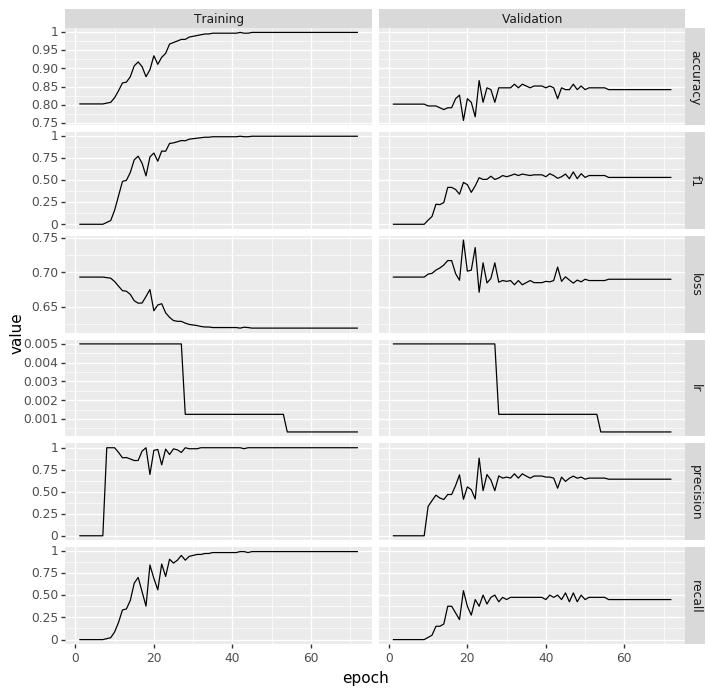

<ggplot: (-9223363297959953839)>

In [57]:
%matplotlib inline
import plotnine as pn
(
    pn.ggplot(
        pd.DataFrame(history).set_index(['epoch', 'type'])
            .rename_axis('metric', axis='columns')
            .stack().rename('value').reset_index()
            .pipe(lambda df: df[df['metric'].isin(['f1', 'loss', 'accuracy', 'lr', 'precision', 'recall'])]),
        pn.aes(x='epoch', y='value')
    ) + 
    pn.geom_line() + 
    pn.facet_grid('metric ~ type', scales='free') + 
    pn.theme(figure_size=(8, 8))
)


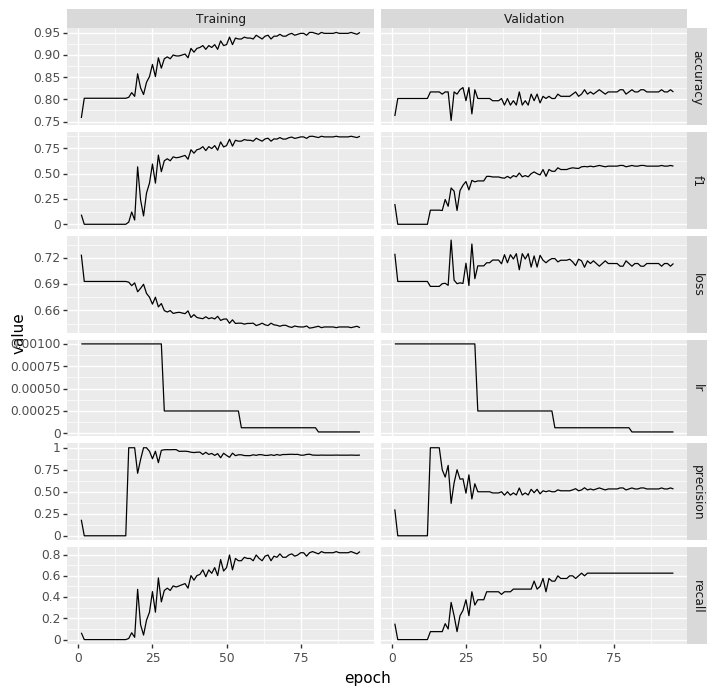

<ggplot: (8728203663834)>

In [61]:
%matplotlib inline
import plotnine as pn
(
pn.ggplot(
    pd.DataFrame(history).set_index(['epoch', 'type'])
        .rename_axis('metric', axis='columns')
        .stack().rename('value').reset_index()
        .pipe(lambda df: df[df['metric'].isin(['f1', 'loss', 'accuracy', 'lr', 'precision', 'recall'])]),
    pn.aes(x='epoch', y='value')
) + 
pn.geom_line() + 
pn.facet_grid('metric ~ type', scales='free') + 
pn.theme(figure_size=(8, 8))
)


### Predict With Restored Model

In [259]:
!du -ch $model_dir/*

2.0M	/tmp/label-model-dev/lmdev_model_1_f1=0.5070423.pth
3.9M	/tmp/label-model-dev/lmdev_optimizer_1_f1=0.5070423.pth
4.0K	/tmp/label-model-dev/lmdev_scheduler_1_f1=0.5070423.pth
5.8M	total


In [61]:
model_restore = RNN(**model_args)

In [70]:
import glob
import pathlib as pl
from collections import defaultdict

def restore_checkpoint(checkpoint_dir):
    files = glob.glob(str(pl.Path(checkpoint_dir) / '*.pth'))
    comps = defaultdict(lambda: [])
    for f in files:
        comps[f.split('_')[1]].append(torch.load(f))
    if any([len(v) > 1 for v in comps.values()]):
        raise ValueError(f'Found multiple checkpoint files for the same component in dir "{checkpoint_dir}"')
    return {k: v[0]  for k, v in comps.items()}
checkpoint = restore_checkpoint(model_dir)

In [71]:
checkpoint['model'].keys()

odict_keys(['wrd_embed.weight', 'pos_embed_e0.weight', 'pos_embed_e1.weight', 'cell.weight_ih_l0', 'cell.weight_hh_l0', 'cell.bias_ih_l0', 'cell.bias_hh_l0', 'cell.weight_ih_l0_reverse', 'cell.weight_hh_l0_reverse', 'cell.bias_ih_l0_reverse', 'cell.bias_hh_l0_reverse', 'output.weight', 'output.bias'])

In [72]:
model_restore.load_state_dict(checkpoint['model'])

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [78]:
from torchtext.data import Iterator
pd.set_option('display.max_colwidth', 300)
batch = next(iter(Iterator(
    ds_val, 
    len(ds_val),
    sort_key=lambda x: len(x.text), 
    sort_within_batch=True,
    repeat=False
)))
Y_pred = model_restore.transform(model_restore.forward(model_restore.prepare(batch)[0])).detach().numpy()
ids = batch.id.numpy()
o = np.argsort(Y_pred)[::-1]
df_pred = df.set_index('id').loc[list(ids[o])].assign(pred=Y_pred[o])
df_pred.head(15)

,label,e0_dist,e0_text,e1_dist,e1_text,token_indices,text,word_indices,pred
id,,,,,,,,,
30835,1,"[-20, -19, -18, -17, -16, -15, -15, -14, -13, -12, -11, -11, -10, -9, -8, -7, -7, -6, -5, -4, -3, -3, -2, -1, -1, 0, 1, 1, 2, 3, 4, 5, 6, 7, 7, 8, 9, 10, 10, 11, 12, 12, 13, 14, 14, 15, 16, 17, 18]",TGF-β,"[-33, -32, -31, -30, -29, -28, -28, -27, -26, -25, -24, -24, -23, -22, -21, -20, -20, -19, -18, -17, -16, -16, -15, -14, -14, -13, -12, -12, -11, -10, -9, -8, -7, -6, -6, -5, -4, -3, -3, -2, -1, -1, 0, 1, 1, 2, 3, 4, 5]",Th17,"[0, 1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 9, 10, 11, 12, 13, 13, 14, 15, 16, 17, 17, 18, 19, 19, 20, 21, 21, 22, 23, 24, 25, 26, 27, 27, 28, 29, 30, 30, 31, 32, 32, 33, 34, 34, 35, 36, 37, 38]","[The, current, understanding, is, that, |, @, interleukin, (, IL)-6, @, |, in, combination, with, |, @, transforming, growth, factor-β, @, |, (, <, @, TGF-β, @, >, ), leads, to, generation, of, |, #, T, helper-17, #, |, (, <, #, Th17, #, >, ), lineage, cells, .]","[0, 1, 2, 3, 4, None, None, 5, 6, 7, None, None, 8, 9, 10, None, None, 11, 12, 13, None, None, 14, None, None, 15, None, None, 16, 17, 18, 19, 20, None, None, 21, 22, None, None, 23, None, None, 24, None, None, 25, 26, 27, 28]",0.987022
30241,1,"[-8, -7, -7, -6, -5, -4, -3, -3, -2, -1, -1, 0, 1, 1, 2, 3, 3, 4, 5, 6, 7, 7, 8, 9, 10, 10, 11, 12, 12, 13, 14, 15, 16, 17, 18, 19, 20, 20, 21, 22, 22, 23, 24, 24, 25, 26, 26, 27, 28, 29, 30, 31, 31, 32, 33, 33, 34, 35, 36, 37, 38, 38, 39, 40, 40, 41, 42, 43]",TGF-β,"[-12, -11, -11, -10, -9, -8, -7, -7, -6, -5, -5, -4, -3, -3, -2, -1, -1, 0, 0, 0, 1, 1, 2, 3, 4, 4, 5, 6, 6, 7, 8, 9, 10, 11, 12, 13, 14, 14, 15, 16, 16, 17, 18, 18, 19, 20, 20, 21, 22, 23, 24, 25, 25, 26, 27, 27, 28, 29, 30, 31, 32, 32, 33, 34, 34, 35, 36, 37]",induced regulatory T,"[0, 1, 1, 2, 3, 4, 5, 5, 6, 7, 7, 8, 9, 9, 10, 11, 11, 12, 13, 14, 15, 15, 16, 17, 18, 18, 19, 20, 20, 21, 22, 23, 24, 25, 26, 27, 28, 28, 29, 30, 30, 31, 32, 32, 33, 34, 34, 35, 36, 37, 38, 39, 39, 40, 41, 41, 42, 43, 44, 45, 46, 46, 47, 48, 48, 49, 50, 51]","[Using, |, @, Transforming, growth, factor-β, @, |, (, <, @, TGF-β, @, >, ), <, #, induced, regulatory, T, #, >, cell, (, |, #, iTreg, #, |, ), system, ,, we, identify, the, TF, |, *, Musculin, *, |, (, |, *, MSC, *, |, ), as, critical, for, |, #, iTreg, #, |, development, by, repression, of, |,...","[0, None, None, 1, 2, 3, None, None, 4, None, None, 5, None, None, 6, None, None, 7, 8, 9, None, None, 10, 11, None, None, 12, None, None, 13, 14, 15, 16, 17, 18, 19, None, None, 20, None, None, 21, None, None, 22, None, None, 23, 24, 25, 26, None, None, 27, None, None, 28, 29, 30, 31, None, Non...",0.986626
30610,1,"[-22, -21, -20, -19, -18, -18, -17, -16, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -7, -6, -5, -4, -3, -3, -2, -1, -1, 0, 1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 13, 14, 15, 15, 16, 17, 18, 18, 19, 20, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]",TGF-β,"[-35, -34, -33, -32, -31, -31, -30, -29, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -20, -19, -18, -17, -16, -16, -15, -14, -14, -13, -12, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, -1, 0, 0, 1, 1, 2, 3, 4, 4, 5, 6, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",regulatory T,"[0, 1, 2, 3, 4, 4, 5, 6, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 15, 16, 17, 18, 19, 19, 20, 21, 21, 22, 23, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 34, 35, 36, 37, 37, 38, 39, 40, 40, 41, 42, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]","[Regulatory, DCs, that, express, |, @, IL-10, @, |, ,, programmed, cell, death-1, (, PD-1, ), ,, |, @, transforming, growth, factor-β, @, |, (, <, @, TGF-β, @, >, ), and, argininase, suppress, effector, T, cell, activation, and, promote, <, #, regulatory, T, #, >, cell, (, |, #, Treg, #, |, ), d...","[0, 1, 2, 3, None, None, 4, None, None, 5, 6, 7, 8, 9, 10, 11, 12, None, None, 13, 14, 15, None, None, 16, None, None, 17, None, None, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, None, None, 28, 29, None, None, 30, 31, No

In [82]:
# Validate that:
# 1. This score matches the score stored in the checkpoint file names
# 2. That sklearn f1_score gives same result as custom f1 score in MetricsLambda
from sklearn.metrics import f1_score
f1_score(df_pred['label'], (df_pred['pred'] > .5).astype(int))

0.5915492957746479